# Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import hyperspy.api as hs
from esmpy.estimators import SmoothNMF
import esmpy.datasets as ds

import matplotlib.pyplot as plt
import numpy as np

from esmpy.models.EDXS_function import print_concentrations_from_W

# Generating artificial datasets and loading them

If the datasets were already generated, they are not generated again

**This is optional**

In [2]:
ds.generate_built_in_datasets(seeds_range=5)
spim = ds.load_particules(sample = 0)

# Loading your data and settings

There are three things to fill here : 
- An input filename in the ``hs.load()`` function
- The acquisition parameters in the ``spim.set_analysis_parameters()`` function. Be careful the previous metadata are overwritten. (I still need to build a function that does not overwrite the already present settings)
- if required you can set the concentrations of some elements in some phases with the function ``spim.set_fixed_W()``. The name of the phases can be changed.

In [3]:
spim = hs.load("../generated_datasets/FpBrgCaPv_N293_paper_/sample_5.hspy")

# spim.axes_manager[-1].offset = 12000
spim.set_signal_type("EDS_ESMPY")
spim.set_analysis_parameters(beam_energy = 200,
azimuth_angle = 0.0,
elevation_angle = 22.0,
tilt_stage = 0.0,
elements = ["Si","Mg","Fe"],
thickness = 200e-7,
density = 3.5,
detector_type = "SDD_efficiency.txt",
width_slope = 0.01,
width_intercept = 0.065,
xray_db = "default_xrays.json")
G = spim.build_G("bremsstrahlung", norm = True)
fW = spim.set_fixed_W({"p0" : {"Si" : 0.0},"p1" : {"Fe" : 0.0}, "p2" : {"Mg" : 0.0}})

# Problem solving

Full hyperspy syntax

## Loading analysis parameters

In [260]:
G = spim.build_G("bremsstrahlung", norm = True)
shape_2d = spim.shape_2d
phases = spim.phases
maps = spim.maps
print(G)
est = SmoothNMF( n_components = 3,tol=0.000001, max_iter = 1000, G = None, mu=0, lambda_L=0,  force_simplex=False) #  true_D = phases, true_A = weights

<bound method EDS_ESMPY.update_G of <EDS_ESMPY, title: , dimensions: (128, 128|500)>>


## Calculating the decomposition

/!\ Depending on the parameters you choose and the size of the data it might take a while

In [261]:
out = spim.decomposition(algorithm = est, return_info=True)

TypeError: To perform a decomposition the data must be of the float or complex type, but the current type is 'int64'. To fix this issue, you can change the type using the change_dtype method (e.g. s.change_dtype('float64')) and then repeat the decomposition.
No decomposition was performed.

## Getting the losses and the results of the decomposition

- First cell : Printing the resulting concentrations.
- Second cell : Ploting the resulting spectra
- Thrid cell : Ploting the resulting abundances

In [ ]:
print_concentrations_from_W(est.W_, elements = spim.metadata.Sample.elements)

AttributeError: 'SmoothNMF' object has no attribute 'W_'

In [ ]:
spim.plot_decomposition_loadings(3)

RuntimeError: No learning results found. A 'decomposition' needs to be performed first.

In [262]:
spim.plot_decomposition_factors(3)

RuntimeError: No learning results found. A 'decomposition' needs to be performed first.

# Problem Solving

With the usual scikit use

In [4]:
G = spim.build_G("bremsstrahlung")
shape_2d = spim.shape_2d
# phases, weights = spim.phases, spim.weights
X = spim.X
est = SmoothNMF( n_components = 3,tol=0.000001, max_iter = 1000, G = None, lambda_L= 0, mu=0, force_simplex=False)

In [5]:
pixels_side = 64

Ximg = X.reshape((-1, pixels_side,pixels_side))
print(Ximg.shape)

(500, 64, 64)


ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

(500, 64)
3
It 10 / 1000: loss 0.008,  319.060 it/s
It 20 / 1000: loss 0.008,  315.273 it/s
It 30 / 1000: loss 0.008,  331.715 it/s
It 40 / 1000: loss 0.008,  333.625 it/s
It 50 / 1000: loss 0.008,  337.564 it/s
It 60 / 1000: loss 0.008,  344.756 it/s


/Users/maxmartinezruts/.local/share/virtualenvs/esmpy-kBfF6zeU/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


It 70 / 1000: loss 0.008,  339.486 it/s
It 80 / 1000: loss 0.008,  329.237 it/s
It 90 / 1000: loss 0.008,  330.548 it/s
It 100 / 1000: loss 0.008,  335.879 it/s
It 110 / 1000: loss 0.008,  342.077 it/s
It 120 / 1000: loss 0.008,  345.384 it/s
It 130 / 1000: loss 0.008,  350.577 it/s
It 140 / 1000: loss 0.008,  349.074 it/s
It 150 / 1000: loss 0.008,  349.942 it/s
It 160 / 1000: loss 0.008,  349.475 it/s
It 170 / 1000: loss 0.008,  352.773 it/s
It 180 / 1000: loss 0.008,  354.583 it/s
It 190 / 1000: loss 0.008,  357.638 it/s
It 200 / 1000: loss 0.008,  360.341 it/s
It 210 / 1000: loss 0.008,  360.521 it/s
It 220 / 1000: loss 0.008,  361.195 it/s
It 230 / 1000: loss 0.008,  363.216 it/s
It 240 / 1000: loss 0.008,  364.053 it/s
It 250 / 1000: loss 0.008,  362.862 it/s
It 260 / 1000: loss 0.008,  365.787 it/s
It 270 / 1000: loss 0.008,  367.834 it/s
It 280 / 1000: loss 0.008,  371.933 it/s
It 290 / 1000: loss 0.008,  371.540 it/s
It 300 / 1000: loss 0.008,  373.556 it/s
It 310 / 1000: loss

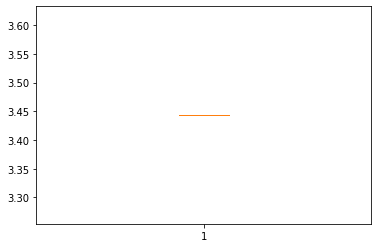

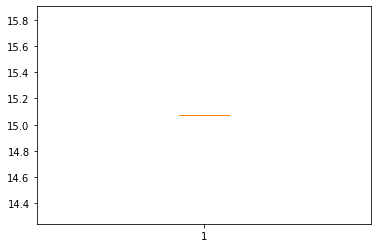

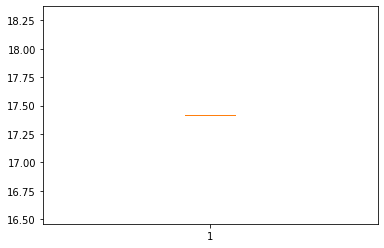

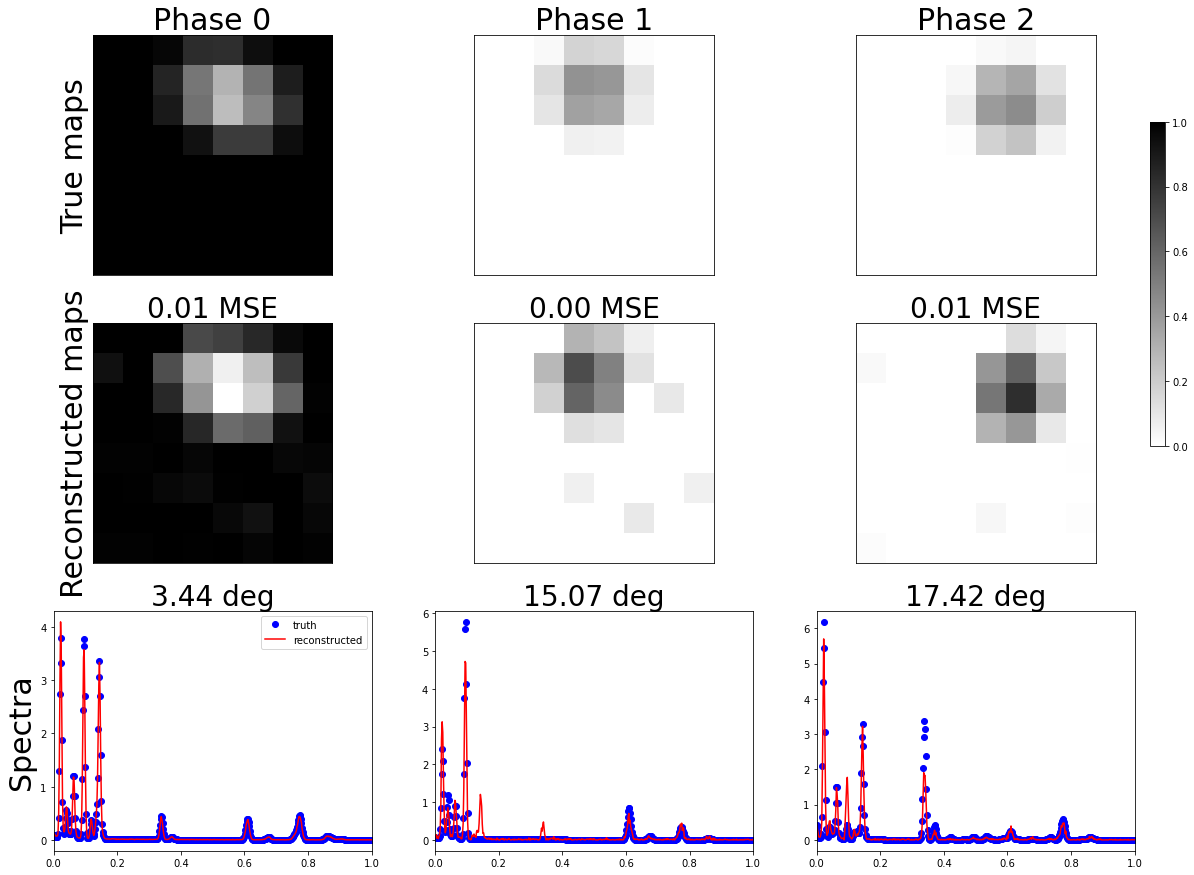

(500, 256)
3
It 10 / 1000: loss 0.023,  134.673 it/s
It 20 / 1000: loss 0.023,  132.176 it/s


/Users/maxmartinezruts/.local/share/virtualenvs/esmpy-kBfF6zeU/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


It 30 / 1000: loss 0.023,  140.391 it/s
It 40 / 1000: loss 0.023,  143.079 it/s
It 50 / 1000: loss 0.023,  149.380 it/s
It 60 / 1000: loss 0.023,  152.600 it/s
It 70 / 1000: loss 0.023,  152.779 it/s
It 80 / 1000: loss 0.023,  154.077 it/s
It 90 / 1000: loss 0.023,  156.387 it/s
It 100 / 1000: loss 0.023,  158.193 it/s
It 110 / 1000: loss 0.023,  159.081 it/s
It 120 / 1000: loss 0.023,  159.300 it/s
It 130 / 1000: loss 0.023,  160.647 it/s
It 140 / 1000: loss 0.023,  160.017 it/s
It 150 / 1000: loss 0.023,  159.629 it/s
It 160 / 1000: loss 0.023,  160.120 it/s
It 170 / 1000: loss 0.023,  160.813 it/s
It 180 / 1000: loss 0.023,  160.938 it/s
It 190 / 1000: loss 0.023,  160.867 it/s
It 200 / 1000: loss 0.023,  161.339 it/s
It 210 / 1000: loss 0.023,  161.390 it/s
It 220 / 1000: loss 0.023,  161.893 it/s
It 230 / 1000: loss 0.023,  161.891 it/s
It 240 / 1000: loss 0.023,  161.850 it/s
It 250 / 1000: loss 0.023,  162.167 it/s
It 260 / 1000: loss 0.023,  162.148 it/s
It 270 / 1000: loss 0.0

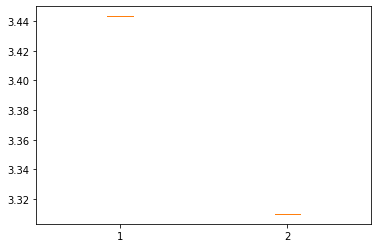

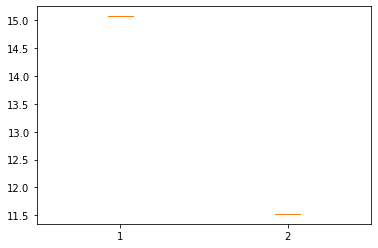

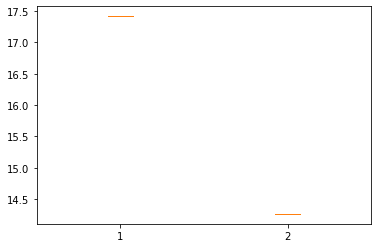

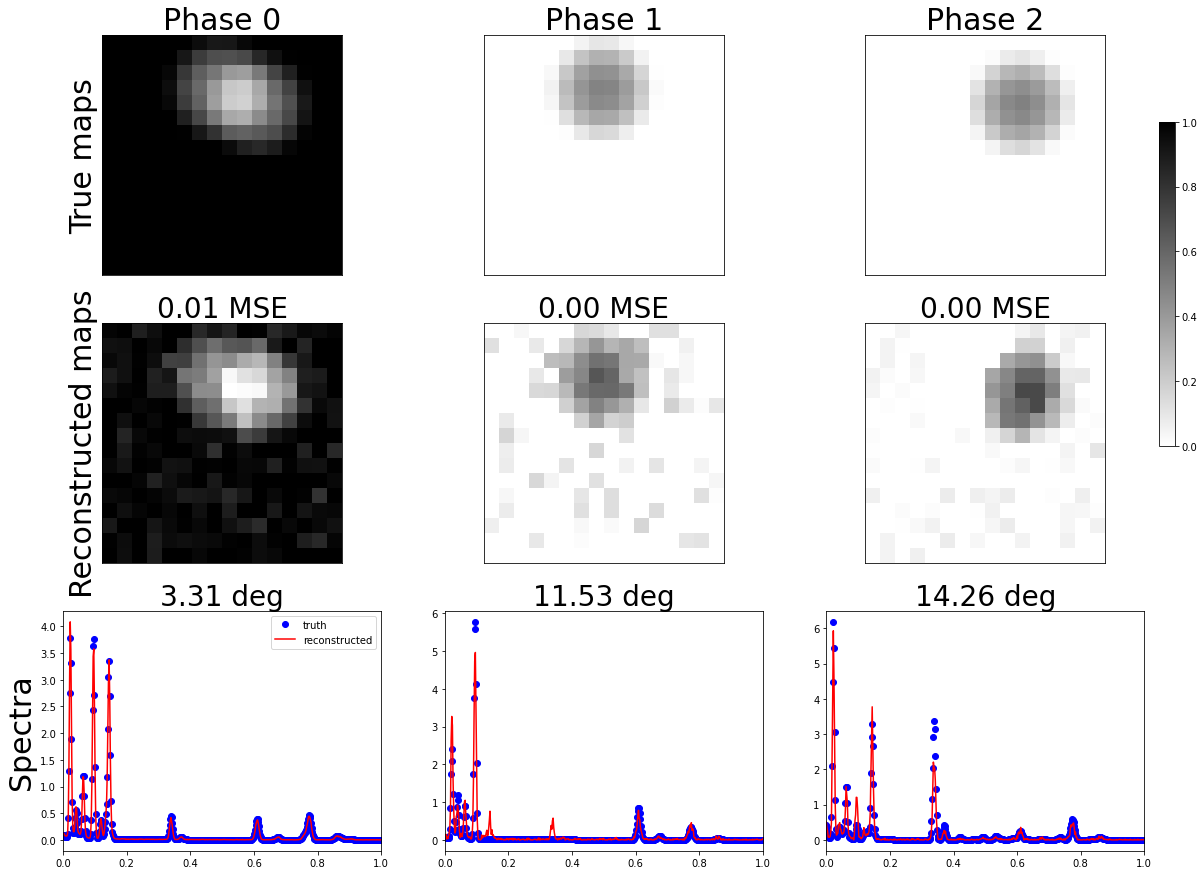

(500, 1024)
3


/Users/maxmartinezruts/.local/share/virtualenvs/esmpy-kBfF6zeU/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


It 10 / 1000: loss 0.057,  52.705 it/s
It 20 / 1000: loss 0.057,  55.687 it/s
It 30 / 1000: loss 0.057,  54.355 it/s
It 40 / 1000: loss 0.057,  54.835 it/s
It 50 / 1000: loss 0.057,  55.795 it/s
It 60 / 1000: loss 0.057,  56.651 it/s
It 70 / 1000: loss 0.057,  57.028 it/s
It 80 / 1000: loss 0.057,  57.413 it/s
It 90 / 1000: loss 0.057,  57.890 it/s
It 100 / 1000: loss 0.057,  57.915 it/s
It 110 / 1000: loss 0.057,  58.191 it/s
It 120 / 1000: loss 0.057,  58.136 it/s
It 130 / 1000: loss 0.057,  58.096 it/s
It 140 / 1000: loss 0.057,  58.399 it/s
It 150 / 1000: loss 0.057,  58.482 it/s
It 160 / 1000: loss 0.057,  58.604 it/s
It 170 / 1000: loss 0.057,  58.590 it/s
It 180 / 1000: loss 0.057,  58.750 it/s
It 190 / 1000: loss 0.057,  58.832 it/s
It 200 / 1000: loss 0.057,  58.938 it/s
It 210 / 1000: loss 0.057,  58.949 it/s
It 220 / 1000: loss 0.057,  58.959 it/s
It 230 / 1000: loss 0.057,  58.988 it/s
It 240 / 1000: loss 0.057,  59.066 it/s
It 250 / 1000: loss 0.057,  59.101 it/s
It 260 / 

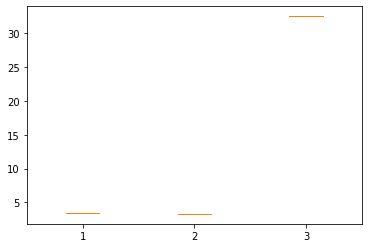

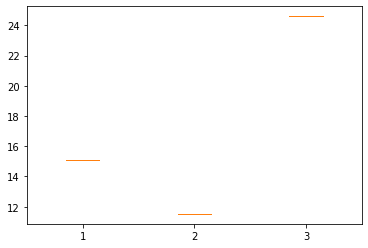

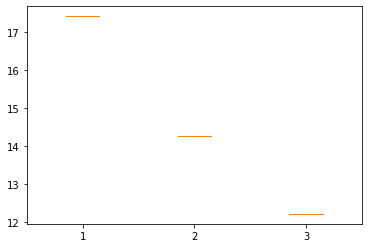

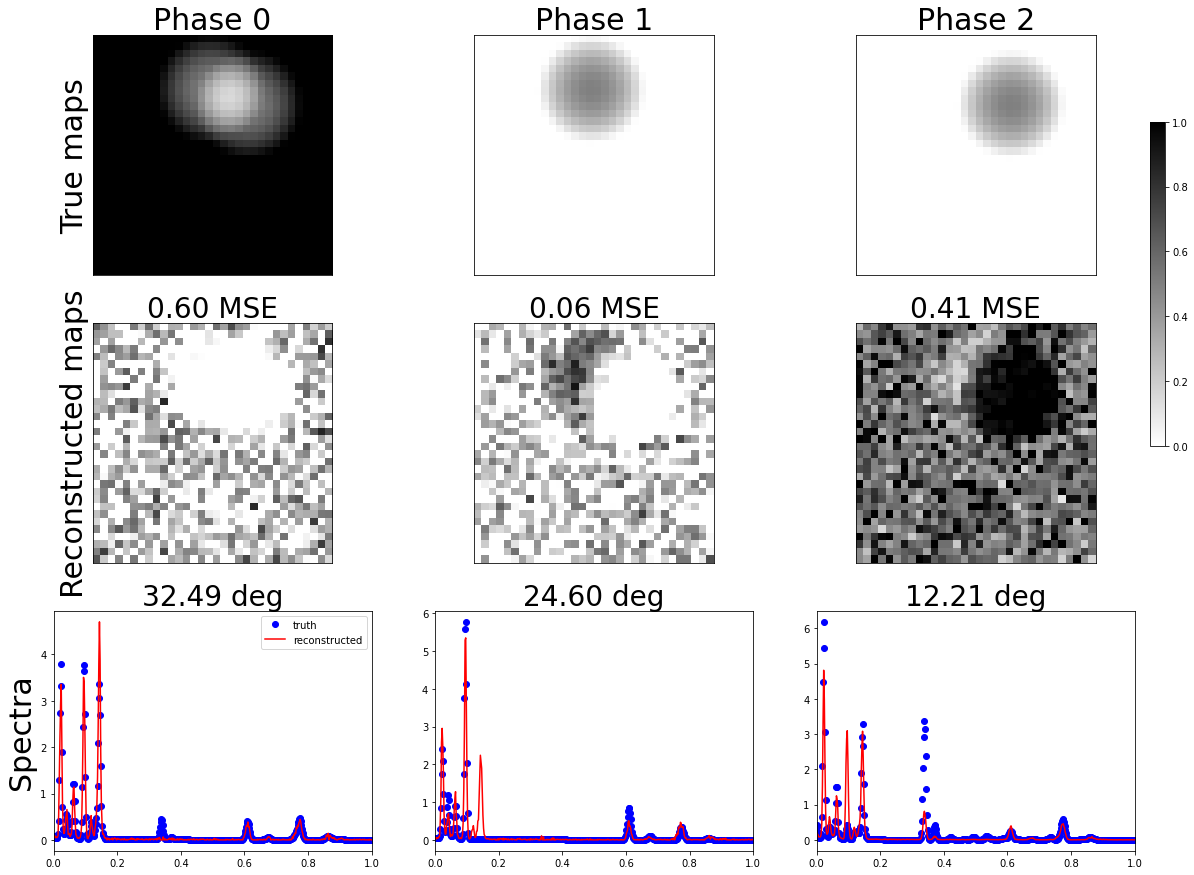

In [10]:
downsampling_factors = [8,4,2]
results_0 = []
results_1 = []
results_2 = []
    
for i in range(len(downsampling_factors)):
    downsample_factor_results_0 = []
    downsample_factor_results_1 = []
    downsample_factor_results_2 = []

    for j in range(1):

        n = downsampling_factors[i]
        X_ = downsample(Ximg,n)
        Xflat = X_.reshape((X_.shape[0], -1))
        print(Xflat.shape)
        D = est.fit_transform(Xflat)
        Hflat = est.H_
        W = est.W_

        Wdot = spim.phases
        Hflatdot = downsample_flat(spim.maps,n, pixels_side)

        angles, _ = find_min_angle(Wdot.T, W.T, unique=True, get_ind=True)

        downsample_factor_results_0.append(angles[0])
        downsample_factor_results_1.append(angles[1])
        downsample_factor_results_2.append(angles[2])

    results_0.append(downsample_factor_results_0)
    results_1.append(downsample_factor_results_1)
    results_2.append(downsample_factor_results_2)

    plt.boxplot(results_0)
    plt.show()

    plt.boxplot(results_1)

    plt.show()

    plt.boxplot(results_2)
    plt.show()
 

    plot_results(Wdot, W, Hflatdot, Hflat, pixels_side//n)

In [7]:
def downsample(X,n):
    b = X.shape[2]//n
    return X.reshape(X.shape[0], -1, n, b, n).sum((-1, -3)) /(n*n)

def downsample_flat(X,n, pixels_side):
    X = X.reshape((-1, pixels_side,pixels_side))
    X = downsample(X,n)
    return X.reshape((-1, pixels_side*pixels_side//n//n))


In [6]:
from esmpy.measures import find_min_angle, find_min_MSE, ordered_mse

def plot_results(Ddot, D, Hdotflat, Hflat, n_pixel_side):
    fontsize = 30
    scale = 15
    aspect_ratio = 1.4
    marker_list = ["-o","-s","->","-<","-^","-v","-d"]
    mark_space = 20
    # cmap = plt.cm.hot_r    
    cmap = plt.cm.gray_r
    vmax = 1
    vmin = 0
    K = Hflat.shape[0]
    L = D.shape[0]
    
    angles, true_inds = find_min_angle(Ddot.T, D.T, unique=True, get_ind=True)
    mse = ordered_mse(Hdotflat, Hflat, true_inds)


    fig, axes = plt.subplots(K,3,figsize = (scale/K * 3 * aspect_ratio,scale))
    x = np.linspace(0,1, num = L)
    for i in range(K): 
        axes[2,i].plot(x,Ddot.T[i,:],'bo',label='truth',linewidth=4)
        axes[2,i].plot(x,D[:,true_inds[i]],'r-',label='reconstructed',markersize=3.5)
        axes[2,i].set_title("{:.2f} deg".format(angles[i]),fontsize = fontsize-2)
        axes[2,i].set_xlim(0,1)

        axes[1,i].imshow((Hflat[true_inds[i],:]).reshape(n_pixel_side,n_pixel_side),vmin = vmin, vmax = vmax , cmap=cmap)
        axes[1,i].set_title("{:.2f} MSE".format(mse[true_inds[i]]),fontsize = fontsize-2)
        # axes[i,1].set_ylim(0.0,1.0)
        axes[1,i].tick_params(axis = "both",labelleft = False, labelbottom = False,left = False, bottom = False)

        im = axes[0,i].imshow(Hdotflat[i].reshape(n_pixel_side,n_pixel_side),vmin = vmin, vmax = vmax, cmap=cmap)
        axes[0,i].set_title("Phase {}".format(i),fontsize = fontsize)
        axes[0,i].tick_params(axis = "both",labelleft = False, labelbottom = False,left = False, bottom = False)
        axes[2,0].legend()

    rows = ["True maps","Reconstructed maps","Spectra"]

    for ax, row in zip(axes[:,0], rows):
        ax.set_ylabel(row, rotation=90, fontsize=fontsize)


    fig.subplots_adjust(right=0.84)
    # put colorbar at desire position
    cbar_ax = fig.add_axes([0.85, 0.5, 0.01, 0.3])
    fig.colorbar(im,cax=cbar_ax)

    # fig.tight_layout()

    plt.show()